In [ ]:
##coursework pt.1 by liuyitao


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
def pdf(x):
    return 0.5 * np.exp(-np.abs(x))
def log_pdf(x):
    return np.log(0.5)-np.abs(x)

In [ ]:
def metropolis(N,s,x0):
    x=np.zeros(N+1)
    x[0]=x0
    for i in range(1,N+1):
        x_p=x[i-1]
        x_s = np.random.normal(loc=x_p, scale=s)
        log_ratio = log_pdf(x_s) - log_pdf(x_p)
        u = np.random.uniform(0, 1)
        if np.log(u) < log_ratio:
            x[i]=x_s
        else:
            x[i]=x_p
    return x
N_a=10000
s_a=1
samples_a = metropolis(N_a, s_a, x0=0)
final_sample = samples_a[1:]



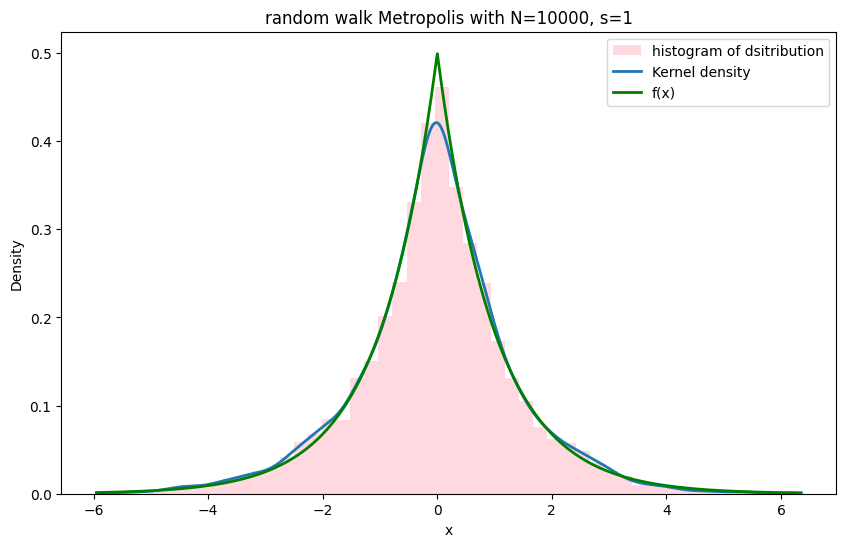

sample mean: -0.0253
sample stadard deviation:1.3803 


In [ ]:
plt.figure(figsize=(10,6))
plt.hist(final_sample , bins=50, density=True, alpha=0.6, color='pink', label='histogram of dsitribution')
kde = stats.gaussian_kde(final_sample)
x_grid = np.linspace(min(final_sample), max(final_sample), 987)
plt.plot(x_grid, kde(x_grid), linewidth=2,label='Kernel density')
plt.plot(x_grid, pdf(x_grid), color='green', linewidth=2, label='f(x)')
plt.legend()
plt.title('random walk Metropolis with N=10000, s=1')
plt.xlabel('x')
plt.ylabel('Density')
plt.show()
print(f"sample mean: {np.mean(final_sample):.4f}")
print(f"sample stadard deviation:{np.std(final_sample, ddof=1):.4f} ")

<>:27: SyntaxWarning: invalid escape sequence '\h'
<>:29: SyntaxWarning: invalid escape sequence '\h'
<>:27: SyntaxWarning: invalid escape sequence '\h'
<>:29: SyntaxWarning: invalid escape sequence '\h'
C:\Users\baby liu\AppData\Local\Temp\ipykernel_16108\418622968.py:27: SyntaxWarning: invalid escape sequence '\h'
  plt.title('Convergence Diagnostic: $\hat{R}$ with Step Size s')
C:\Users\baby liu\AppData\Local\Temp\ipykernel_16108\418622968.py:29: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel('$\hat{R}$ Value')


calculating mew


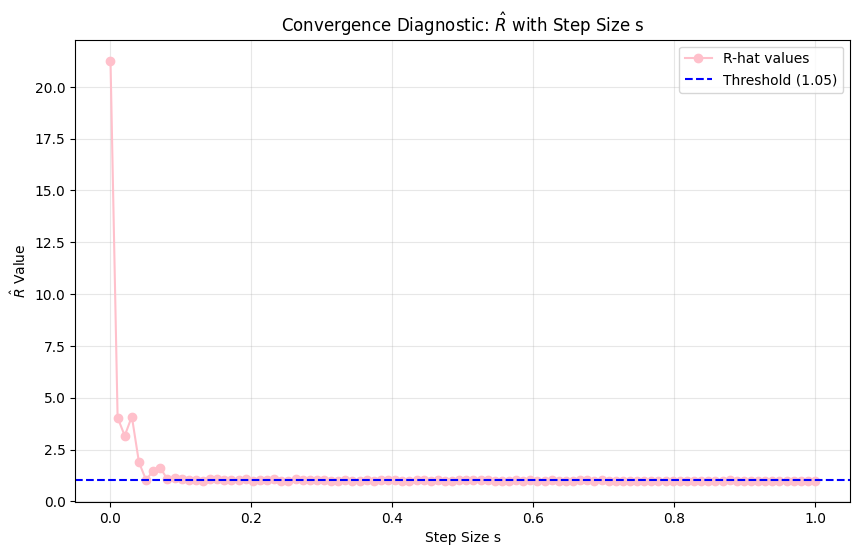

In [ ]:
def R_hat(N, s, J):
    chains = []
    for j in range(J):
        start_v = np.random.normal(0, 1)
        chain_f = metropolis(N, s, start_v)
        chains.append(chain_f[1:])
    chains = np.array(chains).T
    M_j = np.mean(chains, axis=0)
    V_j = np.var(chains, axis=0, ddof=1)
    W = np.mean(V_j)
    M = np.mean(M_j)
    B = np.var(M_j, ddof=0)
    if W == 0: return np.nan
    R_hat = np.sqrt((B + W)/W)
    return R_hat
N_b = 2000
J_b = 4
s_grid = np.linspace(0.001, 1, 100)
r_hat_values = []
print("calculating mew")
for s in s_grid:
    r = R_hat(N_b, s, J_b)
    r_hat_values.append(r)
plt.figure(figsize=(10, 6))
plt.plot(s_grid, r_hat_values, 'o-', color='pink', label='R-hat values')
plt.axhline(y=1.05, color='blue', linestyle='--', label='Threshold (1.05)')
plt.title('Convergence Diagnostic: $\hat{R}$ with Step Size s')
plt.xlabel('Step Size s')
plt.ylabel('$\hat{R}$ Value')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()